# Problem 4

In [3]:
# Write a Python program which solves Ax = b by using PA = LU. Test your result.
import scipy.linalg as linalg
import numpy as np

def lu_solve(A,b):
    # if A is not a np.ndarray, convert it to a np.ndarray for convenience.
    if type(A) != np.ndarray:
        A = np.array(A)
    if type(b) != np.ndarray:
        b = np.array(b)

    P, L, U = linalg.lu(A)
    m,n = A.shape

    # Forward elimination to solve L*y = Pb = c

    y = np.zeros(m)
    c = np.matmul(P.T,b)

    for i in range(m):
        y[i] = c[i] - np.inner(L[i,:i],y[:i])


    # Back substitution to solve U*x = y
    x = np.zeros(n)
    for j in range(n-1,-1,-1):
        x[j] = (y[j] - (np.inner(U[j,j+1:n],x[j+1:n])))/U[j,j]

    return x

In [4]:
# Check lu_solve function gives same solution as linalg.solve function from scipy.
# If their solutions are same, function is working well.

if __name__ == '__main__':
    A = np.random.randn(3,3)
    b = np.random.randn(3)
    print(lu_solve(A,b))
    print(linalg.solve(A,b))

[-0.31625138 -0.8925568  -0.05325808]
[-0.31625138 -0.8925568  -0.05325808]


# Problem 5

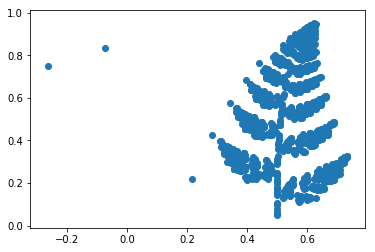

In [19]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

A1 = np.array([[0,0],[0,0.27]])
A2 = np.array([[-.139,.263],[.246,.224]])
A3 = np.array([[.17,-.215],[.222,.176]])
A4 = np.array([[.781, .034],[-.032, .739]])
A = [A1,A2,A3,A4]

d1 = np.array([.5,0])
d2 = np.array([.57,-.036])
d3 = np.array([.408, .0893])
d4 = np.array([.1075, .27])
d = [d1,d2,d3,d4]

p = (.02, .15, .13, .70)

z0 = np.random.randn(2)
z_list = [z0]
for i in range(1000):
    num = np.random.choice(4,1,p=p)[0]
    z_list.append(np.dot(A[num],z_list[i]) + d[num])
    
x = [z[0] for z in z_list]
y = [z[1] for z in z_list]    

plt.scatter(x,y)